# FCIM.M.IA - Artificial Intelligence

> **Lab 5:** Processing Images with OpenCV \\
> **Performed by:** Astafi Valentina, group TI-231M \\
> **Verified by:** Mihail Gavrilita, asist. univ.

## Imports and Utils

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image

## Task 1 -- Write the following functions (A blurring function, A sharpening function using OpenCV. 

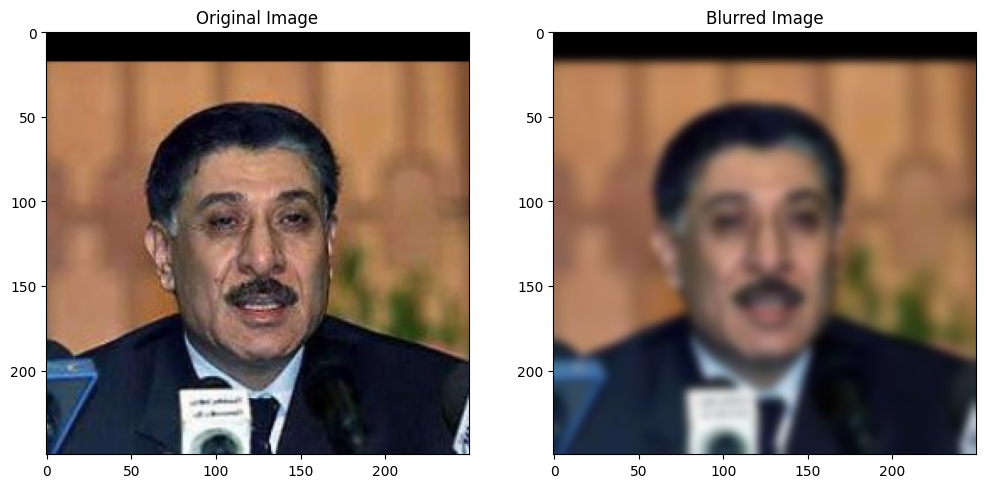

In [3]:
image_path = '/Users/astafivalentina/PycharmProjects/AILabs/5.OpenCV/test_images/33C8EE.jpg'

def blur_image(input_path, output_path=None, kernel_size=(3, 3), sigmaX=20):
    image = cv2.imread(input_path)

    blurred_image = cv2.GaussianBlur(image, kernel_size, sigmaX)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original image')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
    plt.title('Blurred image')

    plt.show()

    if output_path:
        cv2.imwrite(output_path, blurred_image)

blur_image(image_path, output_path='/Users/astafivalentina/PycharmProjects/AILabs/5.OpenCV/image_tasks/image_task_1_blurred.jpg', kernel_size=(15, 15), sigmaX=0)

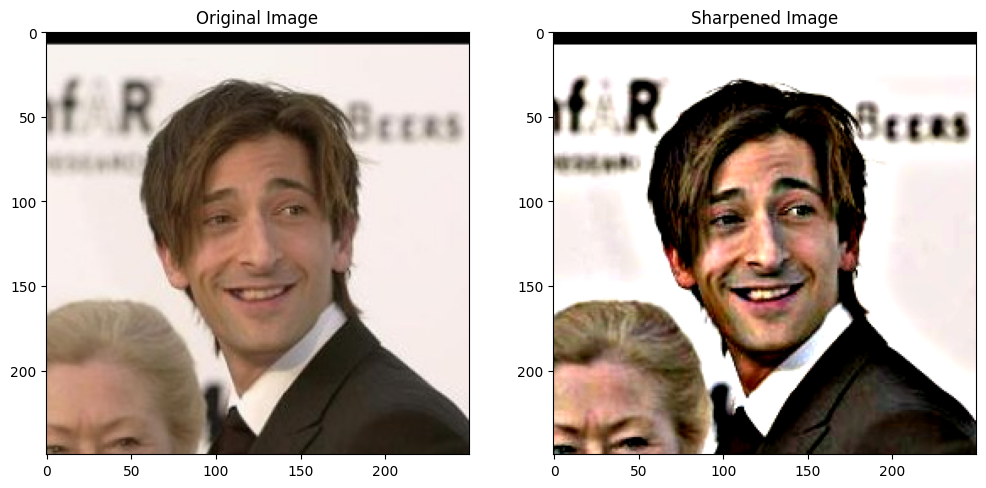

In [6]:
image_path = '/Users/astafivalentina/PycharmProjects/AILabs/5.OpenCV/test_images/4CA327.jpg'

def sharpen_image(input_path, output_path=None, strength=2.5):

    image = cv2.imread(input_path)
    blurred_image = cv2.GaussianBlur(image, (0, 0), 10)

    sharpened_image = cv2.addWeighted(image, 1.0 + strength, blurred_image, -strength, 0)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original image')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
    plt.title('Sharpened image')

    plt.show()

    if output_path:
        cv2.imwrite(output_path, sharpened_image)

sharpen_image(image_path, output_path='/Users/astafivalentina/PycharmProjects/AILabs/5.OpenCV/image_tasks/image_task_1_sharpened.jpg', strength=2.0)

## Task 2 -- Implement a face detection system using OpenCV. 

In [ ]:
image_path = '/Users/astafivalentina/PycharmProjects/AILabs/5.OpenCV/test_images/14A19C.jpg'
def detect_face(image_path, output_path=None):
    cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    if len(faces) == 0:
        print("No face detected!")
        return None
    else:
        print(f"Face detected at coordinates: ({x}, {y}, {w}, {h})")

    if output_path:
        cv2.imwrite(output_path, image)
        print(f"Image saved to {output_path}")

    return image
output_path = '/Users/astafivalentina/PycharmProjects/AILabs/5.OpenCV/image_tasks/image_task_2_detect_face.jpg'

detect_face(image_path, output_path=output_path)

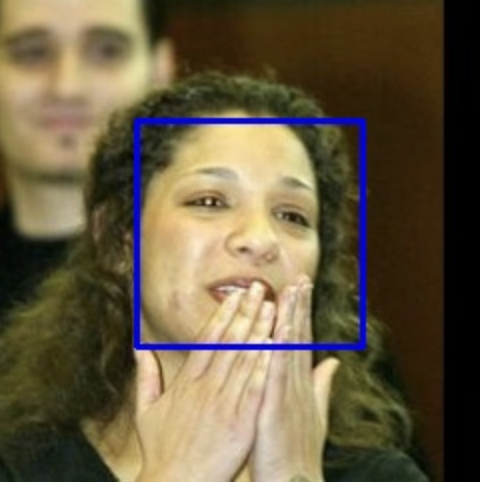

In [9]:
Image(filename="./results/4.png")

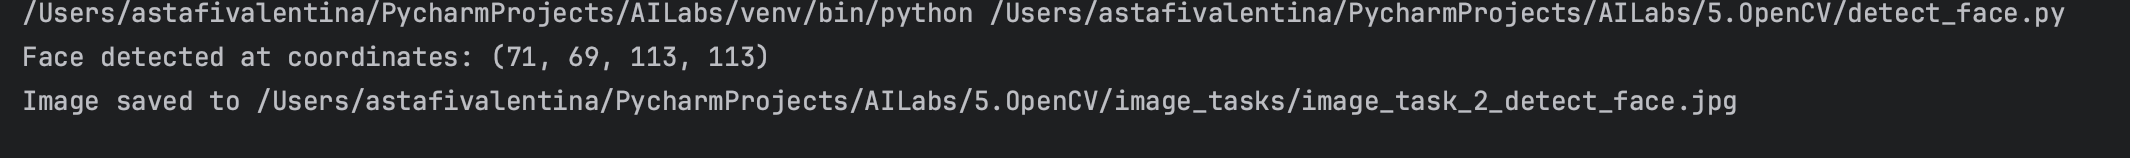

In [5]:
Image(filename="./results/5.png")

## Task 3 -- Implement a system that detects if a photo is accepted for passport or not, by using OpenCV. 

In [ ]:
image_path = '/Users/astafivalentina/PycharmProjects/AILabs/5.OpenCV/test_images/7E0875.jpg'
def check_passport_photo(image_path):

    image = cv2.imread(image_path)

    is_color = (image[:,:,0] != image[:,:,1]).any() or (image[:,:,1] != image[:,:,2]).any()

    if not is_color:
        return False, "Image is not in color"

    height, width, _ = image.shape
    aspect_ratio = width / height
    if not (0.9 <= aspect_ratio <= 1.1):
        return False, "Image is not in portrait orientation or square"

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    if len(faces) != 1:
        return False, "No or multiple faces detected"

    x, y, w, h = faces[0]
    roi_gray = gray[y:y+h, x:x+w]

    eyes = eye_cascade.detectMultiScale(roi_gray)

    if len(eyes) != 2:
        return False, "No or multiple eyes detected"

    (eye1_x, eye1_y, eye1_w, eye1_h), (eye2_x, eye2_y, eye2_w, eye2_h) = eyes

    max_error = 5
    if abs(eye1_y + eye1_h // 2 - eye2_y - eye2_h // 2) > max_error:
        return False, "Eyes are not at the same level"

    head_area = w * h
    image_area = width * height
    if not (0.2 <= head_area / image_area <= 0.5):
        return False, "Head does not represent 20% to 50% of the photo area"

    return True, "Passport photo meets requirements"


is_valid, message = check_passport_photo(image_path)
print(message)

image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Passport photo')
plt.show()

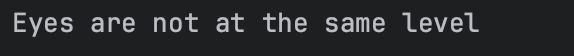

In [6]:
Image(filename="./results/6.png")

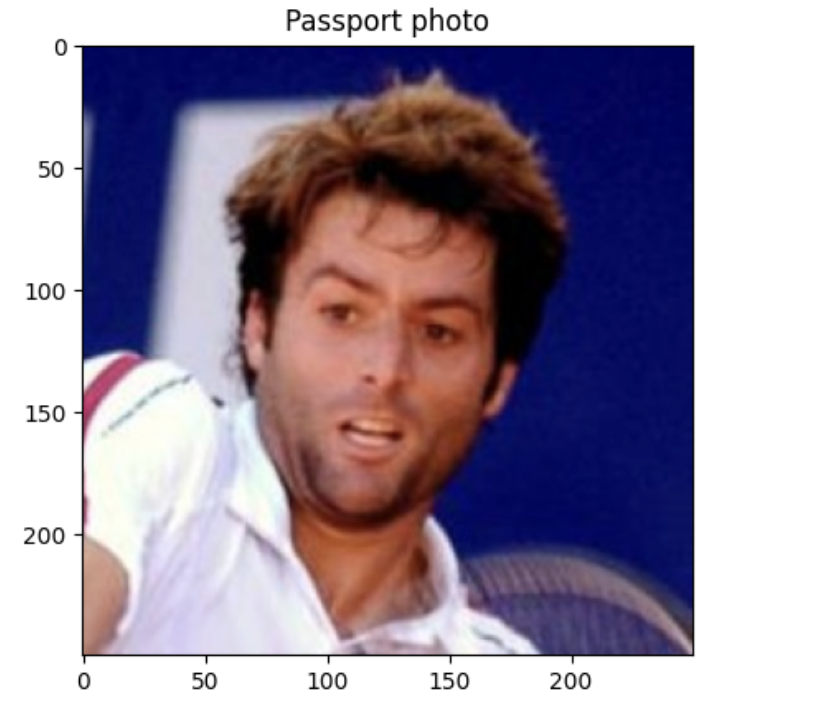

In [7]:
Image(filename="./results/7.png")

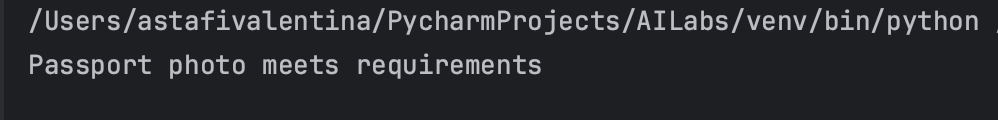

In [8]:
Image(filename="./results/8.png")

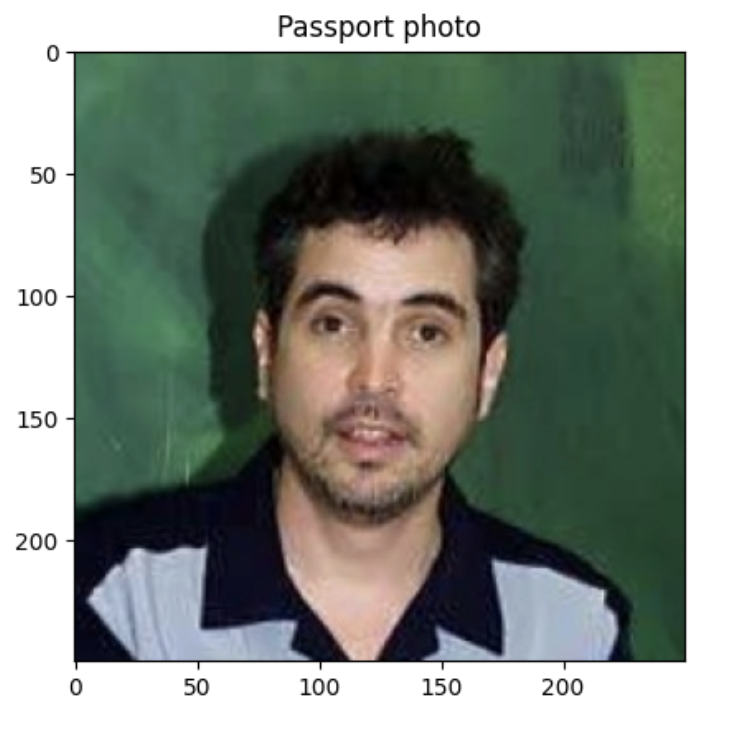

In [22]:
Image(filename="./results/9.png")

In [ ]:
def calculate_accuracy(total_images, images_folder):
    correct_predictions = 0

    for _, row in total_images.iterrows():
        image_path = os.path.join(images_folder, row['new_path'])
        is_valid, _ = check_passport_photo(image_path)

        if is_valid == row['label']:
            correct_predictions += 1

    accuracy = correct_predictions / len(total_images)
    return accuracy

csv_file_path = '/Users/astafivalentina/PycharmProjects/AILabs/5.OpenCV/test.csv'

images_folder = '/Users/astafivalentina/PycharmProjects/AILabs/5.OpenCV/'
total_images = pd.read_csv(csv_file_path)

accuracy = calculate_accuracy(total_images, images_folder)
print(f"System accuracy: {accuracy:.2f}")

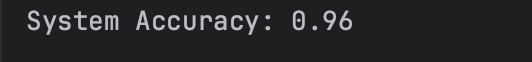

In [9]:
Image(filename="./results/10.png")

## Conclusions:

This research enabled the creation of image blurring and sharpening functions that demonstrate the power and flexibility of the OpenCV library in image processing. Adjusting the parameters and applying these functions provides solutions to improve the visual quality of the photos, thus a face detection system was implemented for the verification of passport photos.
This is possible by analyzing the presence and correct position of the face, eyes.
The OpenCV system is a system that verifies specific facial and image features such as color, orientation, face/eye detection, and eye alignment. It's relatively simple and works well for basic checks.

## Bibliography:

[1] Sharpening An Image using OpenCV Library in Python. Available: https://www.analyticsvidhya.com/blog/2021/08/sharpening-an-image-using-opencv-library-in-python/
[2] Image Processing in OpenCV. Available: https://docs.opencv.org/4.x/d2/d96/tutorial_py_table_of_contents_imgproc.html
[3] Smoothing Images. Available: https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html
[4] Face Detection with Python using OpenCV. Available: https://www.datacamp.com/tutorial/face-detection-python-opencv
[5] Accuracy in Python. Available: https://medium.com/@24littledino/accuracy-in-python-980074154e52